# Brief prairie Simplon.co "Quel voiture est faite pour moi ?"

## Création de la database et table qui va acceuillir les données

```
use dataAi;

drop table if exists cardata;

create table cardata(
Car_Name VARCHAR(100)
,Year INT(4)
,Selling_Price FLOAT(4)
,Present_Price FLOAT(4)
,Kms_Driven INT(10)
,Fuel_Type VARCHAR(100) 
,Seller_Type VARCHAR(100)
,Transmission VARCHAR(100)
,Owner INT(5)
)
; 
```

## Lecture des données et importation dans la database

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import time


engine = create_engine("mysql+pymysql://root@localhost/dataAi")

import_column = "Car_Name  Year    Selling_Price   Present_Price   Kms_Driven    Fuel_Type     Seller_Type     Transmission    Owner"

def chargement(x, link, table):
    
    print("Lecture des données")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Données lu")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("Temps d execution : %s secondes ---" % (time.time() - start_time))


# chargement(import_column,'2020-11-02-brief-car/carData.csv', 'cardata')


## Découverte de Seaborn : catplot

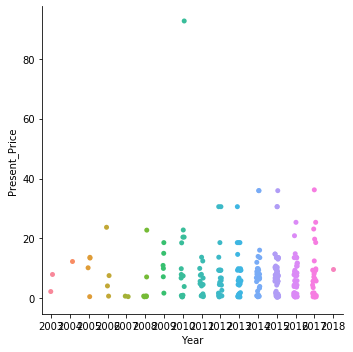

In [5]:
import seaborn as sns

df = pd.read_sql_table('cardata',engine)

g = sns.catplot(x="Year", y="Present_Price", data=df)


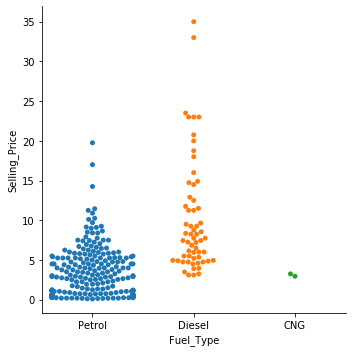

In [9]:
sns.catplot(x="Fuel_Type", y="Selling_Price", kind= 'swarm', data = df)

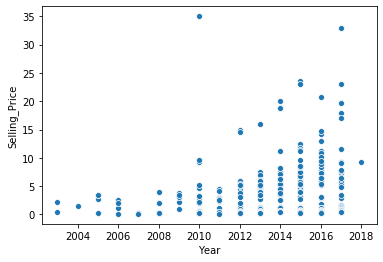

In [10]:
sns.scatterplot(x = 'Year', y = 'Selling_Price', data = df)